# Основные концепции

Давайте разберем три кита, на которых стоит весь математический анализ: пределы, производные и интегралы.


## Основные функции

Прежде всего, давайте вспомним основны, с которыми мы будем работать. Функция — это просто правило, которое для каждого входа (x) дает ровно один выход (y).

*   **Полиномиальная:** $y = x^2 + 2x - 5$. Любая комбинация иксов в разных степенях. Их графики — это плавные кривые.
*   **Экспоненциальная:** $y = e^x$ или $y = 2^x$. Характеризует очень быстрый, взрывной рост (или затухание, если степень отрицательная). Классический пример — рост популяции бактерий или сложный процент в банке. Число $e \approx 2.718$ — это особенная, "естественная" константа для такого роста.
*   **Логарифмическая:** $y = \log(x)$. Это операция, обратная экспоненте. Если экспонента отвечает на вопрос "что будет, если возвести 2 в степень 5?", то логарифм отвечает на вопрос "в какую степень нужно возвести 2, чтобы получить 32?". Логарифмы "замедляют" очень быстрый рост.

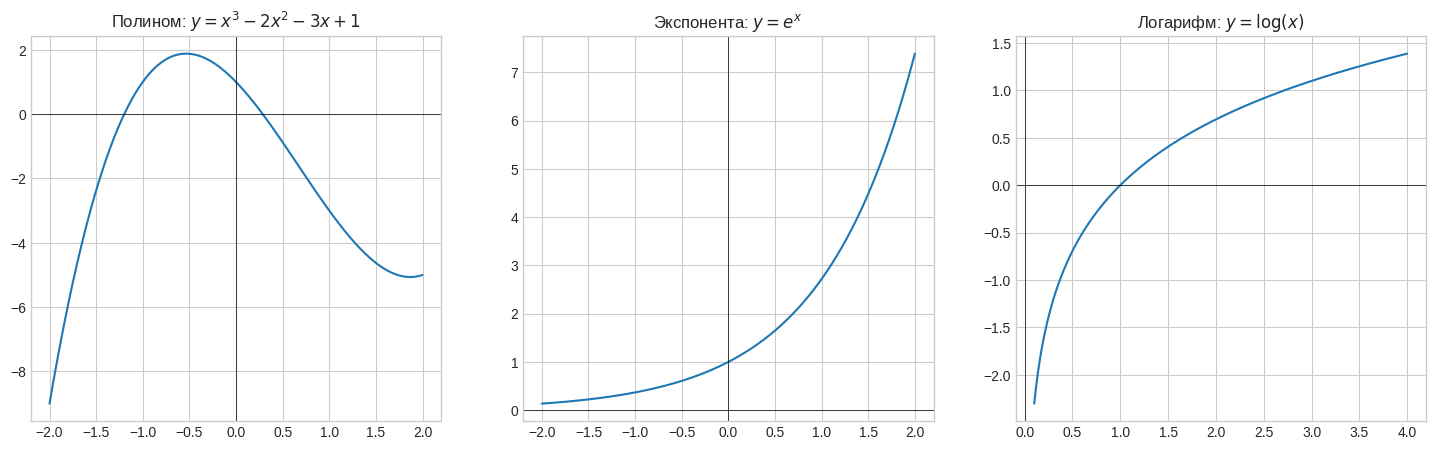

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Настроим красивые графики
plt.style.use('seaborn-v0_8-whitegrid')

# Определим диапазон для x
x = np.linspace(-2, 2, 400)

# Полиномиальная функция
def polynomial(x):
    return x**3 - 2*x**2 - 3*x + 1

# Экспоненциальная функция
def exponential(x):
    return np.exp(x)

# Логарифмическая функция (для x > 0)
x_log = np.linspace(0.1, 4, 400)
def logarithmic(x):
    return np.log(x)

# Визуализация
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].plot(x, polynomial(x))
axs[0].set_title('Полином: $y = x^3 - 2x^2 - 3x + 1$')

axs[1].plot(x, exponential(x))
axs[1].set_title('Экспонента: $y = e^x$')

axs[2].plot(x_log, logarithmic(x_log))
axs[2].set_title('Логарифм: $y = \log(x)$')

for ax in axs:
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)

plt.show()

## Пределы (Limits)

**Предел** — это фундаментальная идея, которая описывает, к какому значению **стремится** функция, когда ее вход (аргумент) приближается к определенной точке. Нам не важно, чему равна функция *в самой этой точке* — нас интересует только её поведение *бесконечно близко* к ней.

**Аналогия с видеоигрой:**
Представьте, что ваш персонаж бежит по графику функции $y = f(x)$. Вы хотите узнать, на какой высоте (значение $y$) он окажется, если добежит до точки $x=c$. Но в самой этой точке может быть лава или пропасть! Вы не можете наступить на нее.

Что вы делаете? Вы подбегаете к точке $c$ очень-очень близко слева, а потом очень-очень близко справа. Если высота, к которой вы стремитесь в обоих случаях, совпадает, — это и есть предел.

Формально это записывается так:

$
\lim_{x \to c} f(x) = L
$

"Предел функции $f(x)$ при $x$, стремящемся к $c$, равен $L$".

Давайте посмотрим на функцию $f(x) = \frac{\sin(x)}{x}$. Эта функция не определена в точке $x=0$ (делить на ноль нельзя). Но к чему она стремится, когда $x$ очень близок к нулю?
$$
\lim_{x \to 0} \frac{\sin(x)}{x} = ?
$$

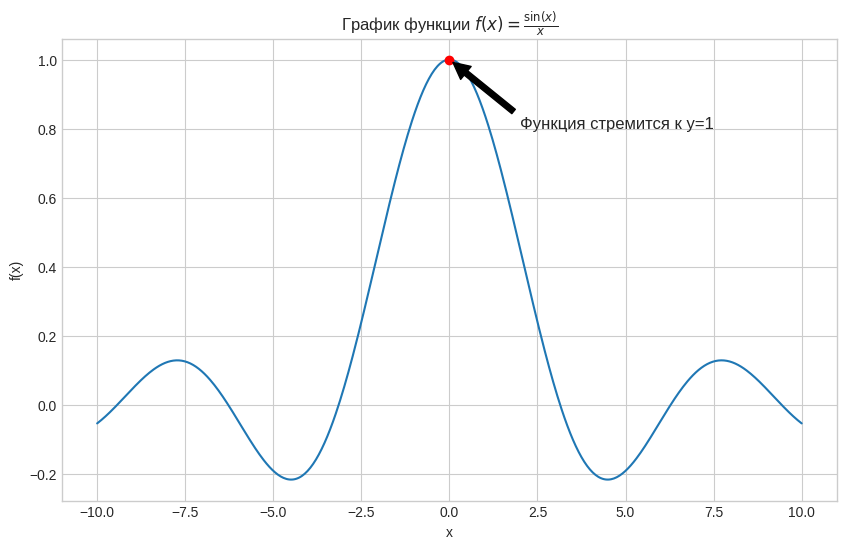

Значение функции в x=0.01: 1.0000
Значение функции в x=-0.01: 1.0000


In [2]:
def sin_x_over_x(x):
    # Добавляем маленькое число, чтобы избежать деления на ноль при визуализации
    return np.sin(x) / (x + 1e-9)

x_lim = np.linspace(-10, 10, 500)
y_lim = sin_x_over_x(x_lim)

plt.figure(figsize=(10, 6))
plt.plot(x_lim, y_lim)
plt.title('График функции $f(x) = \\frac{\\sin(x)}{x}$')
plt.xlabel('x')
plt.ylabel('f(x)')

# Укажем на точку, к которой стремится функция
plt.plot(0, 1, 'ro') # Красная точка в (0, 1)
plt.annotate('Функция стремится к y=1', xy=(0, 1), xytext=(2, 0.8),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12)

plt.show()

print(f"Значение функции в x=0.01: {sin_x_over_x(0.01):.4f}")
print(f"Значение функции в x=-0.01: {sin_x_over_x(-0.01):.4f}")

Как видно из графика и расчетов, хотя в точке $x=0$ функция не существует, с обеих сторон она стремится к значению $y=1$. Это и есть её предел.

## Производная (Differentiation)

Это, пожалуй, самое важное понятие для всего машинного обучения.

> **Производная — это скорость изменения функции в конкретной точке.**

Она показывает, насколько круто "идет вверх" или "идет вниз" график функции в данный момент.

**Аналогия с автомобилем:**
*   **Функция** — это расстояние, которое вы проехали.
*   **Производная** — это показание вашего спидометра в конкретный момент времени.

Если производная большая и положительная — вы быстро едете вперед. Если она равна нулю — вы стоите на месте. Если она отрицательная — вы едете назад.

Давайте визуализируем это для функции $f(x) = x^2$. Ее производная равна $f'(x) = 2x$.

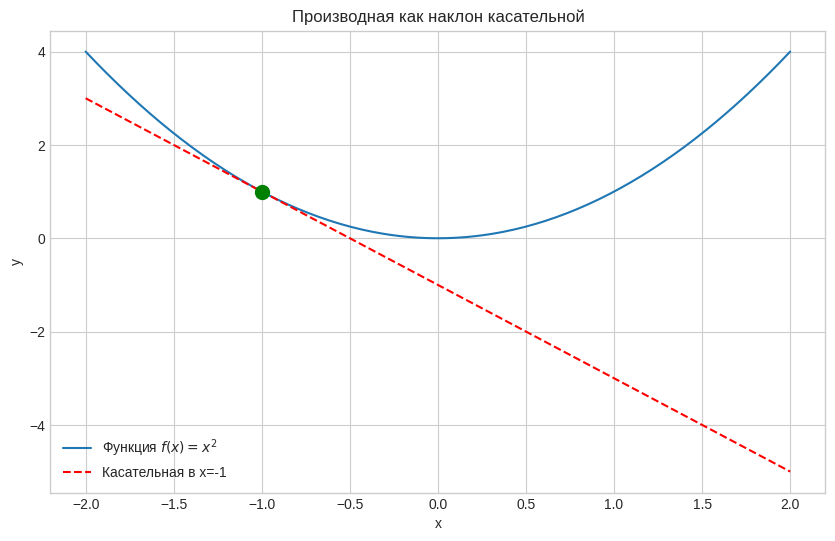

В точке x = -1, наклон (производная) равен -2.
График касательной идет вниз, производная отрицательная.


In [3]:
def f(x):
    return x**2

def f_prime(x): # Производная
    return 2*x

x = np.linspace(-2, 2, 200)
y = f(x)

# Точка, в которой мы ищем производную
x0 = -1
y0 = f(x0)
slope = f_prime(x0) # Наклон касательной

# Уравнение касательной: y = slope * (x - x0) + y0
tangent_line = slope * (x - x0) + y0

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Функция $f(x) = x^2$')
plt.plot(x, tangent_line, 'r--', label=f'Касательная в x={x0}')
plt.plot(x0, y0, 'go', markersize=10) # Точка касания

plt.title('Производная как наклон касательной')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

print(f"В точке x = {x0}, наклон (производная) равен {slope}.")
print("График касательной идет вниз, производная отрицательная.")

В машинном обучении производная (а точнее, **градиент** — ее многомерный аналог) говорит нам, в какую сторону нужно "сдвинуть" параметры модели, чтобы она стала лучше (то есть, чтобы ошибка стала меньше). Мы буквально "спускаемся" по графику функции ошибки в сторону самого крутого склона, и производная указывает нам это направление.

Обозначается как

$f'(x)$, $\frac{dy}{dx}$
или $\frac{d}{dx}f(x)$.

## Интеграл (Integration)

Это операция, обратная взятию производной.

> **Интеграл — это накопленный результат или площадь под графиком функции.**

**Аналогия с автомобилем (продолжение):**
*   **Функция** — это показания вашего спидометра (ваша скорость в каждый момент времени).
*   **Интеграл** — это общее расстояние, которое вы проехали за определенный промежуток времени.

Чтобы найти общее расстояние, мы как бы суммируем все крошечные расстояния, которые проезжали в каждый бесконечно малый момент времени. Интеграл — это и есть такое "бесконечное" суммирование.

Если производная — это про скорость, то интеграл — про пройденный путь. Давайте посчитаем площадь под кривой $y = x^2$ на отрезке от $x=0$ до $x=2$.

$$
\int_{0}^{2} x^2 dx
$$

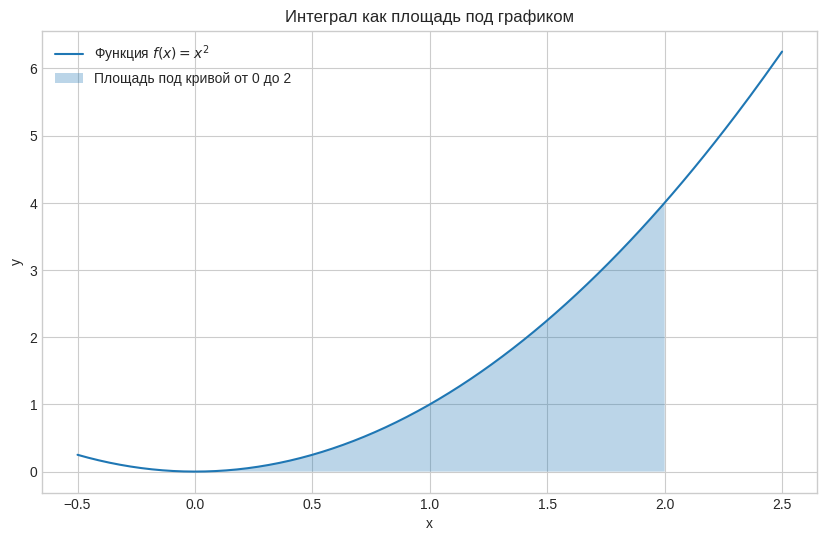

Точное значение площади (интеграла) равно 8/3 ≈ 2.6667


In [4]:
x = np.linspace(-0.5, 2.5, 200)
y = f(x)

# Определяем участок для закрашивания
x_fill = np.linspace(0, 2, 100)
y_fill = f(x_fill)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Функция $f(x) = x^2$')
plt.fill_between(x_fill, y_fill, alpha=0.3, label='Площадь под кривой от 0 до 2')

plt.title('Интеграл как площадь под графиком')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Аналитическое решение: integral(x^2) = x^3 / 3
# Area = F(2) - F(0) = (2^3 / 3) - (0^3 / 3) = 8/3
print(f"Точное значение площади (интеграла) равно 8/3 ≈ {8/3:.4f}")

В теории вероятностей интеграл от функции плотности распределения позволяет нам найти вероятность того, что случайная величина попадет в определенный интервал.

Обозначается как $\int f(x) dx$. Если мы считаем площадь на конкретном отрезке от $a$ до $b$, это называется **определенным интегралом**:

$
\int_{a}^{b} f(x) dx
$